In [2]:
import pandas as pd

# URL da planilha do Google Sheets exportada como CSV
sheet_url = "https://docs.google.com/spreadsheets/d/1t2oGIqW4dmGaN9ndGHTwkJYDZNhbOYifywlSf5TSBi0/export?format=csv"

# Carregar os dados da planilha no DataFrame
df = pd.read_csv(sheet_url)

# Visualizar as primeiras linhas do DataFrame
df.head()


,ano,bioma,area_total,desmatado
0,2009,Pantanal,1.742.229.079,3124.8
1,2011,Pantanal,1.742.229.079,3203.4
2,2010,Pantanal,1.742.229.079,3157.8
3,2005,Pantanal,1.742.229.079,2937.1
4,2002,Pantanal,1.742.229.079,2598.0


In [3]:
# 1. Ordenar os dados cronologicamente pelo ano
df = df.sort_values(by='ano')

# Visualizar as primeiras linhas do DataFrame
df.head()

,ano,bioma,area_total,desmatado
34759,2000,Cerrado,179.558.084,191.4
147735,2000,Mata Atl��ntica,42.092.418,375.3
6083,2000,Cerrado,31.837.788,253.2
36836,2000,Cerrado,233.130.368,1319.3
133306,2000,Mata Atl��ntica,63.157.985,476.3


In [4]:
# Verificar se há valores faltantes em cada coluna
dados_faltantes = df.isnull().sum()

# Exibir a quantidade de dados faltantes
print(dados_faltantes)


ano           0
bioma         0
area_total    0
desmatado     0
dtype: int64


In [5]:
# Verificar os tipos de dados de cada coluna
tipos_de_dados = df.dtypes

# Exibir os tipos de dados
print(tipos_de_dados)


ano             int64
bioma          object
area_total     object
desmatado     float64
dtype: object


In [6]:
# Exibir os valores únicos na coluna 'bioma'
biomas_unicos = df['bioma'].unique()

# Exibir os biomas
print(biomas_unicos)


['Cerrado' 'Mata Atl��ntica' 'Caatinga' 'Amaz��nia' 'Pampa' 'Pantanal']


In [7]:
# Corrigir os valores da coluna 'bioma'
df['bioma'] = df['bioma'].replace({'Mata Atl��ntica': 'Mata Atlântica', 'Amaz��nia': 'Amazônia'})

# Verificar se a correção foi feita corretamente
biomas_unicos_corrigidos = df['bioma'].unique()
print(biomas_unicos_corrigidos)


['Cerrado' 'Mata Atlântica' 'Caatinga' 'Amazônia' 'Pampa' 'Pantanal']


In [8]:
# Ordenar os biomas por ordem alfabética
df['bioma'] = pd.Categorical(df['bioma'], categories=sorted(df['bioma'].unique()), ordered=True)

# Verificar a ordenação
biomas_ordenados = df['bioma'].unique()
print(biomas_ordenados)


['Cerrado', 'Mata Atlântica', 'Caatinga', 'Amazônia', 'Pampa', 'Pantanal']
Categories (6, object): ['Amazônia' < 'Caatinga' < 'Cerrado' < 'Mata Atlântica' < 'Pampa' < 'Pantanal']


In [12]:
# Verificar os anos presentes na planilha
anos_presentes = df['ano'].min(), df['ano'].max()

# Exibir os anos
print(f"A planilha abrange os anos de {anos_presentes[0]} até {anos_presentes[1]}.")

A planilha abrange os anos de 2000 até 2023.


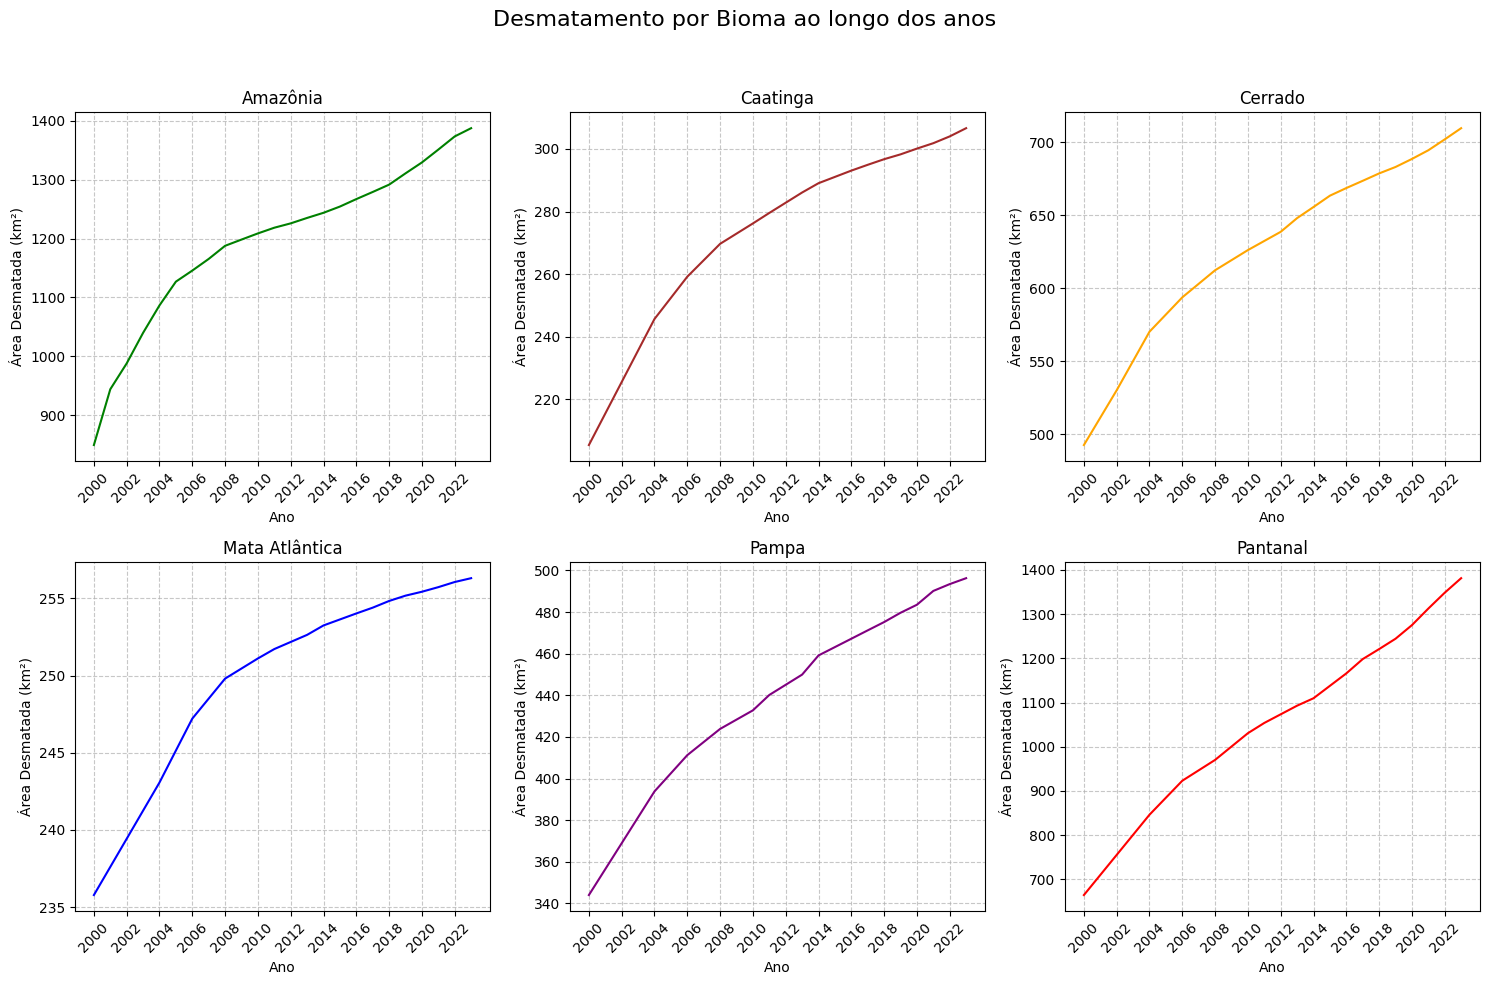

In [24]:
import matplotlib.pyplot as plt

# Lista dos biomas e cores para cada um
biomas_cores = {
    'Amazônia': 'green',
    'Caatinga': 'brown',
    'Cerrado': 'orange',
    'Mata Atlântica': 'blue',
    'Pampa': 'purple',
    'Pantanal': 'red'
}

# Configurar o layout: 2 linhas e 3 colunas
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Desmatamento por Bioma ao longo dos anos', fontsize=16)

# Iterar pelos biomas e gerar gráficos
for ax, (bioma, cor) in zip(axes.flatten(), biomas_cores.items()):
    # Filtrar os dados para o bioma atual
    dados_bioma = df[df['bioma'] == bioma]

    # Agrupar os dados por ano e calcular a média da área desmatada
    dados_bioma_agrupado = dados_bioma.groupby('ano')['desmatado'].mean().reset_index()

    # Criar o gráfico para o bioma
    ax.plot(dados_bioma_agrupado['ano'], dados_bioma_agrupado['desmatado'], linestyle='-', color=cor)
    ax.set_title(bioma)  # Título do gráfico
    ax.set_xlabel('Ano')  # Rótulo do eixo X
    ax.set_ylabel('Área Desmatada (km²)')  # Rótulo do eixo Y
    ax.grid(True, linestyle='--', alpha=0.7)  # Adicionar grade

    # Ajustar os ticks do eixo X
    ax.set_xticks(dados_bioma_agrupado['ano'][::2])  # Mostrar anos de 2 em 2
    ax.tick_params(axis='x', rotation=45)

# Ajustar o layout para evitar sobreposição
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Deixar espaço para o título geral
plt.show()


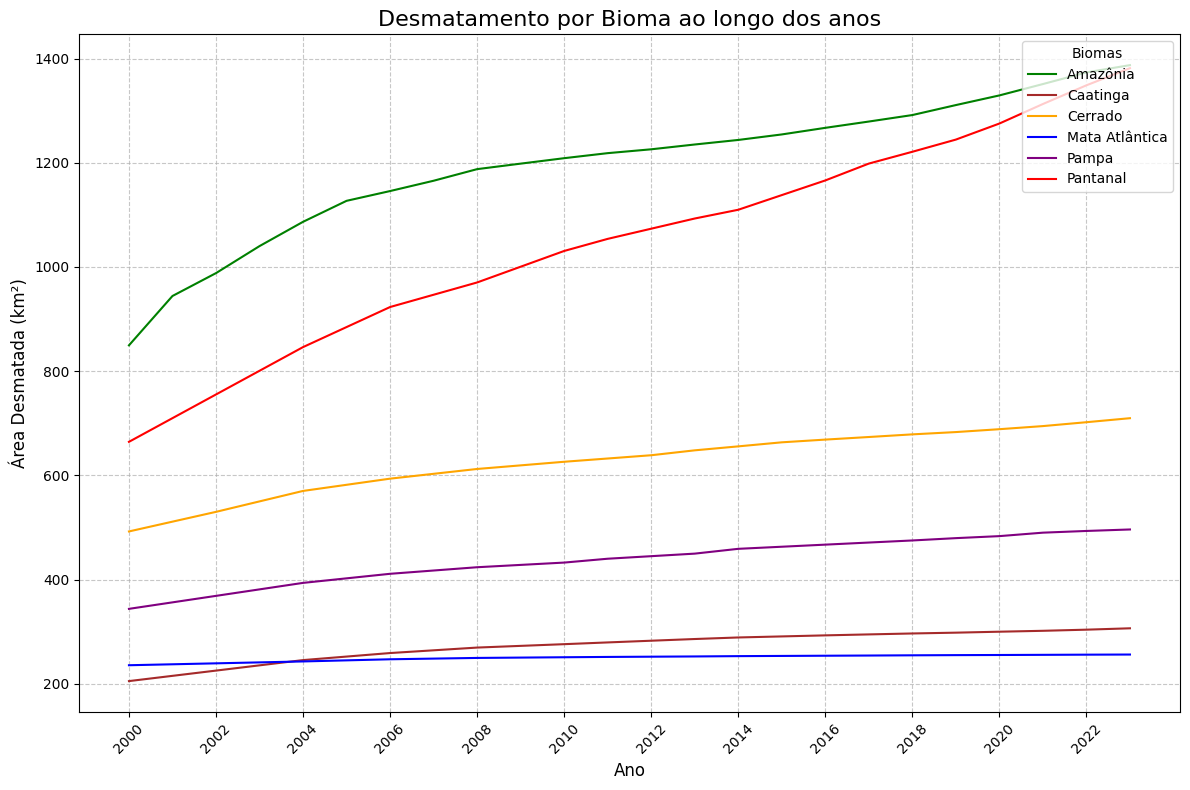

In [18]:
# Configurar o gráfico
plt.figure(figsize=(12, 8))
plt.title('Desmatamento por Bioma ao longo dos anos', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Área Desmatada (km²)', fontsize=12)

# Iterar pelos biomas e adicionar cada um ao gráfico
for bioma, cor in biomas_cores.items():
    # Filtrar os dados para o bioma atual
    dados_bioma = df[df['bioma'] == bioma]

    # Agrupar os dados por ano e calcular a média da área desmatada
    dados_bioma_agrupado = dados_bioma.groupby('ano')['desmatado'].mean().reset_index()

    # Adicionar a linha do bioma ao gráfico
    plt.plot(
        dados_bioma_agrupado['ano'],
        dados_bioma_agrupado['desmatado'],
        label=bioma,
        color=cor,
        linestyle='-'
    )

# Adicionar legenda
plt.legend(title='Biomas', loc='upper right', fontsize=10)

# Adicionar grade
plt.grid(True, linestyle='--', alpha=0.7)

# Ajustar os ticks do eixo X
plt.xticks(dados_bioma_agrupado['ano'][::2], rotation=45)

# Exibir o gráfico
plt.tight_layout()
plt.show()
